In [2]:
# Name: Aayush Keshari
# Date: March 23, 2025
# CS 5165
# Project 4 - Big Data

In [3]:
!pip install pyspark

^C


In [4]:
!pip install requests beautifulsoup4

^C


In [5]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

print(f"\nAnswer to Question 2:")

# Base URL for NCEI Bulk Data Download
base_url = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access"
data_directory = "./weather_data"

# Create the directory if it does not exist
os.makedirs(data_directory, exist_ok=True)

# Download weather data for Cincinnati and Florida for years 2015 to 2024
years = range(2015, 2025)
stations = ["72429793812", "99495199999"]

def download_file(url, local_filename):
    """Download file from a URL and save it locally."""
    with requests.get(url, stream=True) as r:
        if r.status_code == 200:
            with open(local_filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Downloaded: {local_filename}")
        else:
            print(f"Failed to download: {url}")

for year in years:
    year_url = f"{base_url}/{year}/"
    response = requests.get(year_url)
    
    if response.status_code != 200:
        print(f"Error accessing: {year_url}")
        continue

    # Parse HTML to find all file links
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a')

    # Download data for each station and year
    for station in stations:
        filename = f"{station}.csv"
        for link in links:
            if link.get('href') == filename:
                file_url = f"{year_url}{filename}"
                local_path = os.path.join(data_directory, f"{year}_{filename}")
                download_file(file_url, local_path)
                break

# List to store the counts of the datasets
dataset_counts = []

for year in years:
    for station in stations:
        # Skip 2016 for Florida as data is not available
        if year == 2016 and station == "99495199999":
            continue

        file_path = os.path.join(data_directory, f"{year}_{station}.csv")
        
        if os.path.exists(file_path):
            # Read the CSV file using Pandas
            df = pd.read_csv(file_path)
            row_count = len(df)
            dataset_counts.append((year, station, row_count))
            location = "Cincinnati" if station == "72429793812" else "Florida"
            print(f"{location} --> Year: {year}, Station: {station}, Count: {row_count}")
        else:
            print(f"File not found for Year: {year}, Station: {station}")

# Display total results
if len(dataset_counts) == 19:
    print("\nTotal Results: 19 (as expected)")
else:
    print(f"\nTotal Results: {len(dataset_counts)} (unexpected)")


Answer to Question 2:
Downloaded: ./weather_data\2015_72429793812.csv
Downloaded: ./weather_data\2015_99495199999.csv
Downloaded: ./weather_data\2016_72429793812.csv
Downloaded: ./weather_data\2017_72429793812.csv
Downloaded: ./weather_data\2017_99495199999.csv
Downloaded: ./weather_data\2018_72429793812.csv
Downloaded: ./weather_data\2018_99495199999.csv
Downloaded: ./weather_data\2019_72429793812.csv
Downloaded: ./weather_data\2019_99495199999.csv
Downloaded: ./weather_data\2020_72429793812.csv
Downloaded: ./weather_data\2020_99495199999.csv
Downloaded: ./weather_data\2021_72429793812.csv
Downloaded: ./weather_data\2021_99495199999.csv
Downloaded: ./weather_data\2022_72429793812.csv
Downloaded: ./weather_data\2022_99495199999.csv
Downloaded: ./weather_data\2023_72429793812.csv
Downloaded: ./weather_data\2023_99495199999.csv
Downloaded: ./weather_data\2024_72429793812.csv
Downloaded: ./weather_data\2024_99495199999.csv
Cincinnati --> Year: 2015, Station: 72429793812, Count: 365
Flori

In [6]:
import os
import pandas as pd

# Directory containing the CSV files
data_directory = "./weather_data"

# Years for which data is available
years = range(2015, 2025)

# List CSV files for Cincinnati and Florida
cincinnati_files = [f"{data_directory}/{year}_72429793812.csv" for year in years]
florida_files = [f"{data_directory}/{year}_99495199999.csv" for year in years if year != 2016]  # Exclude 2016 for Florida

# Load data from CSV files into Pandas DataFrames
cincinnati_dfs = [pd.read_csv(file) for file in cincinnati_files if os.path.exists(file)]
florida_dfs = [pd.read_csv(file) for file in florida_files if os.path.exists(file)]

# Concatenate all DataFrames for Cincinnati and Florida
cincinnati_df = pd.concat(cincinnati_dfs, ignore_index=True)
florida_df = pd.concat(florida_dfs, ignore_index=True)

# Display total row counts
print(f"Cincinnati Data Count (Total Number of Rows): {len(cincinnati_df)}")
print(f"Florida Data Count (Total Number of Rows)   : {len(florida_df)}")

Cincinnati Data Count (Total Number of Rows): 3653
Florida Data Count (Total Number of Rows)   : 2483


In [7]:
import os
import pandas as pd
from tabulate import tabulate

print("\nAnswer to Question 3:")

# Directory and years range
data_directory = "./weather_data"
years = range(2015, 2025)
stations = ["72429793812", "99495199999"]

# Store hottest days data for Cincinnati, Florida, and overall hottest day per year
hottest_days_cincinnati = []
hottest_days_florida = []
hottest_days_overall = []

# Find hottest day for each year in Cincinnati and Florida, and then compare
for year in years:
    year_data = []
    for station in stations:
        # Skip 2016 for Florida as data may not be available
        if year == 2016 and station == "99495199999":
            continue

        file_path = f"{data_directory}/{year}_{station}.csv"
        if os.path.exists(file_path):
            # Load data and filter out invalid temperature values
            df = pd.read_csv(file_path)
            df = df[df["MAX"] != 9999.9]

            # Find the hottest day for this station if data is available
            if not df.empty:
                hottest_day = df.loc[df["MAX"].idxmax()]
                hottest_day_data = {
                    "YEAR": year,
                    "STATION": hottest_day["STATION"],
                    "NAME": hottest_day["NAME"],
                    "DATE": hottest_day["DATE"],
                    "MAX": hottest_day["MAX"]
                }
                year_data.append(hottest_day_data)

                # Separate lists for Cincinnati and Florida
                if station == "72429793812":
                    hottest_days_cincinnati.append(hottest_day_data)
                elif station == "99495199999":
                    hottest_days_florida.append(hottest_day_data)

    # Determine the hottest day overall for the year by comparing both stations
    if year_data:
        hottest_day_year = max(year_data, key=lambda x: x["MAX"])
        hottest_days_overall.append(hottest_day_year)

# Convert lists to DataFrames
hottest_days_cincinnati_df = pd.DataFrame(hottest_days_cincinnati).sort_values(by="YEAR")
hottest_days_florida_df = pd.DataFrame(hottest_days_florida).sort_values(by="YEAR")
hottest_days_overall_df = pd.DataFrame(hottest_days_overall).sort_values(by="YEAR")

# Display results in formatted tables
print("\nHottest Days by Year (Cincinnati):\n")
print(tabulate(hottest_days_cincinnati_df, headers="keys", tablefmt="fancy_grid", floatfmt=".1f", showindex=False))

print("\nHottest Days by Year (Florida):\n")
print(tabulate(hottest_days_florida_df, headers="keys", tablefmt="fancy_grid", floatfmt=".1f", showindex=False))

print("\nOverall Hottest Day by Year (Cincinnati and Florida):\n")
print(tabulate(hottest_days_overall_df, headers="keys", tablefmt="fancy_grid", floatfmt=".1f", showindex=False))


Answer to Question 3:

Hottest Days by Year (Cincinnati):

╒════════╤═════════════╤══════════════════════════════════════════════════╤════════════╤═══════╕
│   YEAR │     STATION │ NAME                                             │ DATE       │   MAX │
╞════════╪═════════════╪══════════════════════════════════════════════════╪════════════╪═══════╡
│   2015 │ 72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2015-06-12 │  91.9 │
├────────┼─────────────┼──────────────────────────────────────────────────┼────────────┼───────┤
│   2016 │ 72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2016-07-24 │  93.9 │
├────────┼─────────────┼──────────────────────────────────────────────────┼────────────┼───────┤
│   2017 │ 72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2017-07-22 │  91.9 │
├────────┼─────────────┼──────────────────────────────────────────────────┼────────────┼───────┤
│   2018 │ 72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD,

In [8]:
import os
import pandas as pd
from tabulate import tabulate

# Prevent scientific notation for large numbers in station IDs
pd.options.display.float_format = '{:.0f}'.format

print("\nAnswer to Question 4:")

# Directory and years range
data_directory = "./weather_data"
years = range(2015, 2025)
stations = ["72429793812", "99495199999"]

# List to store coldest day data for each station across all years
march_min_temps = []

# Find the coldest day in March across all years for each station
for year in years:
    for station in stations:
        file_path = f"{data_directory}/{year}_{station}.csv"
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['DATE'] = pd.to_datetime(df['DATE'])
            march_df = df[df['DATE'].dt.month == 3]

            # Filter out invalid temperature values
            march_df = march_df[march_df["MIN"] != 9999.9]
            
            # Find the coldest day in March for this file, if available
            if not march_df.empty:
                coldest_day = march_df.loc[march_df["MIN"].idxmin()]
                march_min_temps.append({
                    "YEAR": year,
                    "STATION": str(coldest_day["STATION"]),  # Ensure Station ID is stored as a string
                    "NAME": coldest_day["NAME"],
                    "DATE": coldest_day["DATE"],
                    "MIN": coldest_day["MIN"]
                })

# Convert the list to a DataFrame and find the overall coldest day in March across all years
all_march_min_df = pd.DataFrame(march_min_temps)
coldest_overall_day = all_march_min_df.loc[all_march_min_df["MIN"].idxmin()]

# Prepare data for display
results = [
    {
        "Year": int(coldest_overall_day["YEAR"]),
        "Station ID": coldest_overall_day["STATION"],
        "Station Name": coldest_overall_day["NAME"],
        "Date": coldest_overall_day["DATE"].strftime("%Y-%m-%d"),
        "Min Temp (°F)": round(coldest_overall_day["MIN"], 1)
    }
]

# Display the result in a well-formatted table
print("\nColdest Day Overall in March (2015-2024) across Cincinnati and Florida:\n")
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))


Answer to Question 4:

Coldest Day Overall in March (2015-2024) across Cincinnati and Florida:

╒════════╤══════════════╤══════════════════════════════════════════════════╤════════════╤═════════════════╕
│   Year │   Station ID │ Station Name                                     │ Date       │   Min Temp (°F) │
╞════════╪══════════════╪══════════════════════════════════════════════════╪════════════╪═════════════════╡
│   2015 │  72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2015-03-06 │             3.2 │
╘════════╧══════════════╧══════════════════════════════════════════════════╧════════════╧═════════════════╛


In [9]:
import os
import pandas as pd
from tabulate import tabulate

# Prevent scientific notation for large numbers in station IDs
pd.options.display.float_format = '{:.0f}'.format

print("\nAnswer to Question 5:")

# Directory and years range
data_directory = "./weather_data"
years = range(2015, 2025)

# Calculate mean precipitation by year for Cincinnati
cincinnati_precip_data = []

for year in years:
    file_path = f"{data_directory}/{year}_72429793812.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Filter out invalid precipitation values
        df = df[df["PRCP"] != 9999.9]
        if not df.empty:
            mean_prcp = df["PRCP"].mean()
            cincinnati_precip_data.append({
                "YEAR": year,
                "STATION": str(df["STATION"].iloc[0]),  # Convert to string to preserve full ID
                "NAME": df["NAME"].iloc[0],
                "Mean_PRCP": mean_prcp
            })

cincinnati_precip_df = pd.DataFrame(cincinnati_precip_data)
cincinnati_result = cincinnati_precip_df.loc[cincinnati_precip_df["Mean_PRCP"].idxmax()]

# Calculate mean precipitation by year for Florida (excluding 2016 as data is unavailable)
florida_precip_data = []

for year in years:
    if year == 2016:
        continue
    file_path = f"{data_directory}/{year}_99495199999.csv"
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df = df[df["PRCP"] != 9999.9]
        if not df.empty:
            mean_prcp = df["PRCP"].mean()
            florida_precip_data.append({
                "YEAR": year,
                "STATION": str(df["STATION"].iloc[0]),  # Convert to string to preserve full ID
                "NAME": df["NAME"].iloc[0],
                "Mean_PRCP": mean_prcp
            })

florida_precip_df = pd.DataFrame(florida_precip_data)
florida_result = florida_precip_df.loc[florida_precip_df["Mean_PRCP"].idxmax()]

# Prepare data for display
results = [
    {
        "Year": int(cincinnati_result["YEAR"]),
        "Station": cincinnati_result["STATION"],
        "Station Name": cincinnati_result["NAME"],
        "Mean PRCP": round(cincinnati_result["Mean_PRCP"], 2)
    },
    {
        "Year": int(florida_result["YEAR"]),
        "Station": florida_result["STATION"],
        "Station Name": florida_result["NAME"],
        "Mean PRCP": round(florida_result["Mean_PRCP"], 2)
    }
]

# Display the results in a well-formatted table
print("\nYear with Most Precipitation for Cincinnati and Florida:\n")
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))


Answer to Question 5:

Year with Most Precipitation for Cincinnati and Florida:

╒════════╤═════════════╤══════════════════════════════════════════════════╤═════════════╕
│   Year │     Station │ Station Name                                     │   Mean PRCP │
╞════════╪═════════════╪══════════════════════════════════════════════════╪═════════════╡
│   2024 │ 72429793812 │ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │         4.5 │
├────────┼─────────────┼──────────────────────────────────────────────────┼─────────────┤
│   2015 │ 99495199999 │ SEBASTIAN INLET STATE PARK, FL US                │         0   │
╘════════╧═════════════╧══════════════════════════════════════════════════╧═════════════╛


In [10]:
import os
import pandas as pd

print("\nAnswer to Question 6:")

# Define file paths for 2024 data for Cincinnati and Florida
cincinnati_2024_file = "./weather_data/2024_72429793812.csv"
florida_2024_file = "./weather_data/2024_99495199999.csv"

# Load 2024 data for Cincinnati and Florida if the files exist
if os.path.exists(cincinnati_2024_file):
    cincinnati_df = pd.read_csv(cincinnati_2024_file)
    # Count missing GUST values (marked as 999.9) and calculate percentage
    cincinnati_missing_count = (cincinnati_df["GUST"] == 999.9).sum()
    cincinnati_total_count = len(cincinnati_df)
    cincinnati_missing_percentage = (cincinnati_missing_count / cincinnati_total_count) * 100
else:
    cincinnati_missing_percentage = None

if os.path.exists(florida_2024_file):
    florida_df = pd.read_csv(florida_2024_file)
    florida_missing_count = (florida_df["GUST"] == 999.9).sum()
    florida_total_count = len(florida_df)
    florida_missing_percentage = (florida_missing_count / florida_total_count) * 100
else:
    florida_missing_percentage = None

# Display the results
print("\nPercentage of Missing Values for Wind Gust (column GUST) for Cincinnati and Florida in 2024:\n")
if cincinnati_missing_percentage is not None:
    print(f"Cincinnati: {cincinnati_missing_percentage:.2f}%")
else:
    print("Cincinnati data file for 2024 not found.")

if florida_missing_percentage is not None:
    print(f"Florida: {florida_missing_percentage:.2f}%")
else:
    print("Florida data file for 2024 not found.")


Answer to Question 6:

Percentage of Missing Values for Wind Gust (column GUST) for Cincinnati and Florida in 2024:

Cincinnati: 39.07%
Florida: 100.00%


In [11]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from tabulate import tabulate

print("\nAnswer to Question 7:")

# File path for Cincinnati 2020 data
cincinnati_2020_file = "./weather_data/2020_72429793812.csv"

# Load 2020 data for Cincinnati if the file exists
if os.path.exists(cincinnati_2020_file):
    df = pd.read_csv(cincinnati_2020_file)
    
    # Filter out invalid temperature values and rows with missing TEMP values
    df = df[df["TEMP"] != 9999.9].dropna(subset=["TEMP"])
    df["TEMP"] = df["TEMP"].astype(float)
    df["DATE"] = pd.to_datetime(df["DATE"])
    df["MONTH"] = df["DATE"].dt.month_name()  # Get month name directly

    # Define the month order
    month_order = {
        "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
        "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
    }

    # Calculate statistics for each month
    stats_results = []
    for month in df["MONTH"].unique():
        month_df = df[df["MONTH"] == month]
        if not month_df.empty:
            mean_temp = month_df["TEMP"].mean()
            std_dev_temp = month_df["TEMP"].std()
            median_temp = month_df["TEMP"].median()
            
            # Calculate mode, handling cases where mode might be a scalar
            mode_result = stats.mode(month_df["TEMP"], nan_policy='omit')
            mode_temp = mode_result.mode[0] if hasattr(mode_result.mode, "__len__") else mode_result.mode
            
            stats_results.append({
                "MONTH": month,
                "Mean_TEMP": mean_temp,
                "StandardDeviation_TEMP": std_dev_temp,
                "Median_TEMP": median_temp,
                "Mode_TEMP": mode_temp
            })

    # Convert results to DataFrame and sort by month order
    final_stats_df = pd.DataFrame(stats_results)
    final_stats_df["MONTH_ORDER"] = final_stats_df["MONTH"].map(month_order)
    final_stats_df = final_stats_df.sort_values(by="MONTH_ORDER").drop(columns="MONTH_ORDER")

    # Display results in a well-formatted table
    print("\nTemperature Statistics for Cincinnati for Each Month in 2020:\n")
    print(tabulate(final_stats_df, headers="keys", tablefmt="fancy_grid", floatfmt=".2f", showindex=False))
else:
    print("Cincinnati 2020 data file not found.")
    


Answer to Question 7:

Temperature Statistics for Cincinnati for Each Month in 2020:

╒═══════════╤═════════════╤══════════════════════════╤═══════════════╤═════════════╕
│ MONTH     │   Mean_TEMP │   StandardDeviation_TEMP │   Median_TEMP │   Mode_TEMP │
╞═══════════╪═════════════╪══════════════════════════╪═══════════════╪═════════════╡
│ January   │       37.95 │                     8.35 │         37.70 │       24.70 │
├───────────┼─────────────┼──────────────────────────┼───────────────┼─────────────┤
│ February  │       36.59 │                     7.90 │         36.00 │       25.90 │
├───────────┼─────────────┼──────────────────────────┼───────────────┼─────────────┤
│ March     │       49.07 │                     8.78 │         47.80 │       39.60 │
├───────────┼─────────────┼──────────────────────────┼───────────────┼─────────────┤
│ April     │       51.78 │                     7.31 │         51.10 │       39.20 │
├───────────┼─────────────┼──────────────────────────┼─────────

In [12]:
import os
import pandas as pd
from tabulate import tabulate

print("\nAnswer to Question 8:")

# File path for Cincinnati 2017 data
cincinnati_2017_file = "./weather_data/2017_72429793812.csv"

# Load the 2017 data for Cincinnati
if os.path.exists(cincinnati_2017_file):
    df = pd.read_csv(cincinnati_2017_file)
    
    # Convert TEMP and WDSP to float and filter for relevant conditions
    df["TEMP"] = pd.to_numeric(df["TEMP"], errors="coerce")
    df["WDSP"] = pd.to_numeric(df["WDSP"], errors="coerce")
    filtered_df = df[(df["TEMP"] < 50) & (df["WDSP"] > 3)].dropna(subset=["TEMP", "WDSP"])

    # Calculate Wind Chill using the formula
    filtered_df["Wind_Chill"] = (
        35.74 + (0.6215 * filtered_df["TEMP"]) - (35.75 * (filtered_df["WDSP"] ** 0.16)) +
        (0.4275 * filtered_df["TEMP"] * (filtered_df["WDSP"] ** 0.16))
    )

    # Get the top 10 days with the lowest Wind Chill
    top_10_lowest_wc = filtered_df.nsmallest(10, "Wind_Chill")[["NAME", "DATE", "TEMP", "WDSP", "Wind_Chill"]]

    # Display results in a well-formatted table
    print("\nTop 10 Days with the Lowest Wind Chill for Cincinnati in 2017:\n")
    print(tabulate(top_10_lowest_wc, headers="keys", tablefmt="fancy_grid", floatfmt=".2f", showindex=False))
else:
    print("Cincinnati 2017 data file not found.")
    


Answer to Question 8:

Top 10 Days with the Lowest Wind Chill for Cincinnati in 2017:

╒══════════════════════════════════════════════════╤════════════╤════════╤════════╤══════════════╕
│ NAME                                             │ DATE       │   TEMP │   WDSP │   Wind_Chill │
╞══════════════════════════════════════════════════╪════════════╪════════╪════════╪══════════════╡
│ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2017-01-07 │  10.50 │   7.00 │        -0.41 │
├──────────────────────────────────────────────────┼────────────┼────────┼────────┼──────────────┤
│ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2017-12-31 │  11.00 │   5.30 │         2.03 │
├──────────────────────────────────────────────────┼────────────┼────────┼────────┼──────────────┤
│ CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US │ 2017-12-27 │  13.00 │   5.80 │         3.82 │
├──────────────────────────────────────────────────┼────────────┼────────┼────────┼──────────────┤
│ CINCINNATI MUNICIPA

In [13]:
import os
import pandas as pd

print("\nAnswer to Question 9:")

# Directory and years for Florida files
data_directory = "./weather_data"
years = [y for y in range(2015, 2025) if y != 2016]  # Exclude 2016 if data is unavailable

# Initialize a counter for extreme weather days
extreme_weather_days_count = 0

# Load and process data for each year in the specified range
for year in years:
    florida_file = f"{data_directory}/{year}_99495199999.csv"
    
    if os.path.exists(florida_file):
        df = pd.read_csv(florida_file)
        
        # Ensure each FRSHTT value is a six-character string
        df['FRSHTT'] = df['FRSHTT'].astype(str).str.zfill(6)
        
        # Count days with any extreme weather indicator
        extreme_weather_days = df[df['FRSHTT'].apply(
            lambda x: any(x[i] == "1" for i in range(6))
        )]
        
        # Update the total count of extreme weather days
        extreme_weather_days_count += len(extreme_weather_days)

# Display the result
print(f"\nNumber of Days with Extreme Weather Conditions in Florida from 2015 to 2024: {extreme_weather_days_count}\n")



Answer to Question 9:

Number of Days with Extreme Weather Conditions in Florida from 2015 to 2024: 0




Answer to Question 10:
Predicted Maximum Temperatures for Cincinnati:
November 2024: 75.00°F
December 2024: 64.92°F

Model Performance:
R² Score (November Model): 0.0000, MSE: 30.8489
R² Score (December Model): 0.1942, MSE: 7.5280


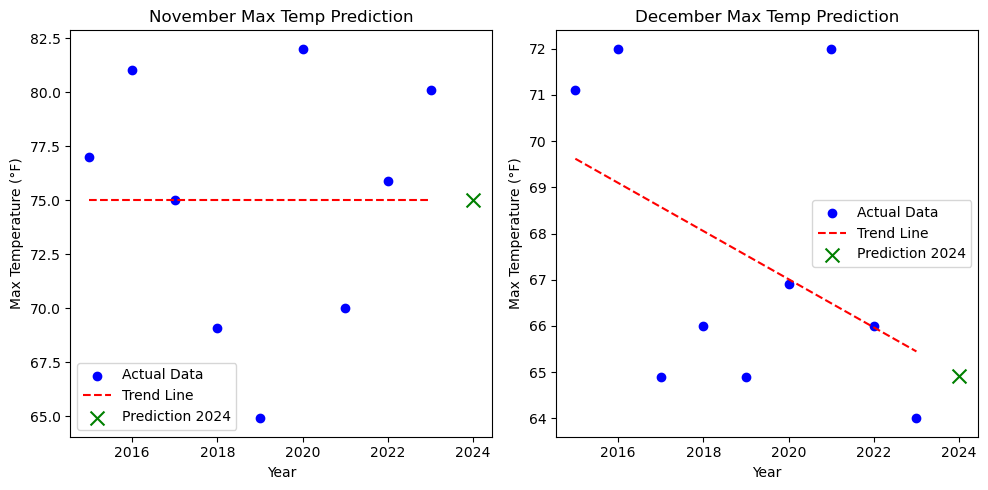

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("\nAnswer to Question 10:")

# Load all available data for Cincinnati (2015-2023)
data_directory = "./weather_data"
years = list(range(2015, 2024))  # Include all years up to 2023
cincinnati_files = [f"{data_directory}/{year}_72429793812.csv" for year in years]

# Read and concatenate data
cincinnati_data = pd.concat([pd.read_csv(file) for file in cincinnati_files if os.path.exists(file)], ignore_index=True)

# Data Cleaning
cincinnati_data = cincinnati_data[cincinnati_data["MAX"] != 9999.9]  # Remove invalid MAX values
cincinnati_data["DATE"] = pd.to_datetime(cincinnati_data["DATE"])
cincinnati_data["YEAR"] = cincinnati_data["DATE"].dt.year
cincinnati_data["MONTH"] = cincinnati_data["DATE"].dt.month

# Extract MAX temperatures for November and December
november_data = cincinnati_data[cincinnati_data["MONTH"] == 11].groupby("YEAR")["MAX"].max().reset_index()
december_data = cincinnati_data[cincinnati_data["MONTH"] == 12].groupby("YEAR")["MAX"].max().reset_index()

# Prepare data for modeling
X_nov = november_data["YEAR"].values.reshape(-1, 1)
y_nov = november_data["MAX"].values
X_dec = december_data["YEAR"].values.reshape(-1, 1)
y_dec = december_data["MAX"].values

# Train Linear Regression models
nov_model = LinearRegression().fit(X_nov, y_nov)
dec_model = LinearRegression().fit(X_dec, y_dec)

# Predict for 2024
nov_pred_2024 = nov_model.predict([[2024]])[0]
dec_pred_2024 = dec_model.predict([[2024]])[0]

# Evaluate Model Performance
nov_r2 = r2_score(y_nov, nov_model.predict(X_nov))
dec_r2 = r2_score(y_dec, dec_model.predict(X_dec))

nov_mse = mean_squared_error(y_nov, nov_model.predict(X_nov))
dec_mse = mean_squared_error(y_dec, dec_model.predict(X_dec))

# Display predictions and model performance
print("Predicted Maximum Temperatures for Cincinnati:")
print(f"November 2024: {nov_pred_2024:.2f}°F")
print(f"December 2024: {dec_pred_2024:.2f}°F")
print(f"\nModel Performance:")
print(f"R² Score (November Model): {nov_r2:.4f}, MSE: {nov_mse:.4f}")
print(f"R² Score (December Model): {dec_r2:.4f}, MSE: {dec_mse:.4f}")

# Plot trend and prediction
plt.figure(figsize=(10, 5))

# November Plot
plt.subplot(1, 2, 1)
plt.scatter(X_nov, y_nov, color='blue', label='Actual Data')
plt.plot(X_nov, nov_model.predict(X_nov), color='red', linestyle='--', label='Trend Line')
plt.scatter([2024], [nov_pred_2024], color='green', marker='x', s=100, label="Prediction 2024")
plt.xlabel("Year")
plt.ylabel("Max Temperature (°F)")
plt.title("November Max Temp Prediction")
plt.legend()

# December Plot
plt.subplot(1, 2, 2)
plt.scatter(X_dec, y_dec, color='blue', label='Actual Data')
plt.plot(X_dec, dec_model.predict(X_dec), color='red', linestyle='--', label='Trend Line')
plt.scatter([2024], [dec_pred_2024], color='green', marker='x', s=100, label="Prediction 2024")
plt.xlabel("Year")
plt.ylabel("Max Temperature (°F)")
plt.title("December Max Temp Prediction")
plt.legend()

plt.tight_layout()
plt.show()
